<a href="https://colab.research.google.com/github/manuelncsu/Bacterial-WGS-bioinformatics-workshop/blob/main/Day_1/Bioinformatics_course_Day_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

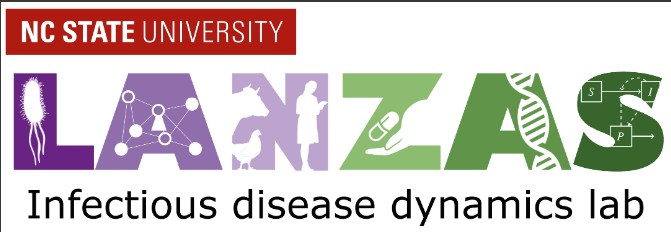

# **Bacterial WGS bioinformatics workshop**
## **Day 1.** Data Search and fetching metadata

##**Step 1:** Mounting your google drive into google colab

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


##Lets check if it works!

In [ ]:
ls

gdrive/  sample_data/


##Lets go to the workshop main folder

In [ ]:
cd /content/gdrive/Shareddrives/Bacterial_bioinformatics_workshop/Day_1

/content/gdrive/Shareddrives/Bacterial_bioinformatics_workshop/Day_1


In [ ]:
ls

'Bioinformatics course_Day 1'   condacolab_install.log   SRA_sequences_subsample.txt


##**Step 2:** Lets check if some needed software are installed

##Install Conda

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:15
🔁 Restarting kernel...


##Verify Conda installation

In [ ]:
!conda --version

conda 23.1.0


##Lets install some necessary packages in your Conda environment

In [ ]:
!conda install pandas numpy matplotlib

##Install Biopython

In [ ]:
!pip3 install biopython

# **Step 3:** Getting familiar with NCBI
### Install the required packages

In [ ]:
!apt-get update
!apt-get install ncbi-entrez-utils

In [ ]:
!apt-get update

In [ ]:
!apt-get install --reinstall libcurl4-openssl-dev

In [ ]:
!apt-get install -y ncbi-entrez-direct

In [ ]:
from Bio import Entrez

##Try this command to check that esearch works

In [ ]:
!esearch -db bioproject -query PRJNA344770

curl: /usr/local/lib/libcurl.so.4: no version information available (required by curl)
<ENTREZ_DIRECT>
  <Db>bioproject</Db>
  <WebEnv>MCID_65bbafe0b1324f1d3a414d91</WebEnv>
  <QueryKey>1</QueryKey>
  <Count>1</Count>
  <Step>1</Step>
</ENTREZ_DIRECT>


##Perform the initial search and save the sequences to a file

In [ ]:
#Check our working directory
!pwd

/content/gdrive/Shareddrives/Workshop Manuel & Alba


## Now lets download the sequences associated to an specific study, in this case: Determining the cause of recurrent *Clostridium difficile* infection using whole genome sequencing, Link: https://doi.org/10.1016/j.diagmicrobio.2016.09.023

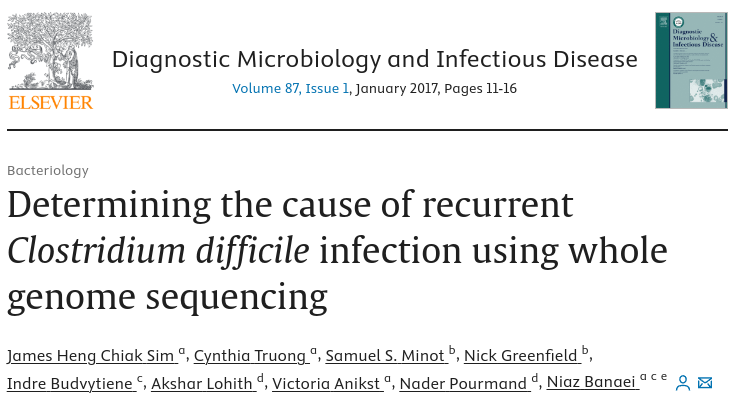

In [ ]:
!esearch -db sra -query 'PRJNA344770' | efetch -format docsum | grep SRR | cut -d '"' -f 2 > SRA_sequences.txt

curl: /usr/local/lib/libcurl.so.4: no version information available (required by curl)
curl: /usr/local/lib/libcurl.so.4: no version information available (required by curl)


In [ ]:
ls

'Bioinformatics course'  'Course content.gslides'     Lanzas_lab_logo_v2.jpg
 condacolab_install.log  'Course Organization.gdoc'   SRA_sequences.txt


##Once the .txt file was generated, you can read the first 10 lines using the following code

In [ ]:
# Specify the file name
file_name = "SRA_sequences.txt"

# Read the first 10 lines
with open(file_name, "r") as file:
    for i in range(10):
        line = file.readline()
        print(line)


SRR4300580

SRR4300579

SRR4300578

SRR4300577

SRR4300576

SRR4300575

SRR4300574

SRR4300573

SRR4300572

SRR4300571



##Create a subsample file with the first 10 sequences

In [ ]:
input_file_path = 'SRA_sequences.txt'
output_file_path = 'SRA_sequences_subsample.txt'

# Open the input file and read the first 10 lines
with open(input_file_path, 'r') as input_file:
    lines_to_keep = [next(input_file) for _ in range(10)]

# Open the output file and write the selected lines
with open(output_file_path, 'w') as output_file:
    output_file.writelines(lines_to_keep)

In [ ]:
ls

'Bioinformatics course'   'Course Organization.gdoc'     SRA_sequences.txt
 condacolab_install.log    Lanzas_lab_logo_v2.jpg
'Course content.gslides'   SRA_sequences_subsample.txt


##Fetch metadata for a list of SRA sequences

In [ ]:
!xargs -a SRA_sequences_subsample.txt -I {} efetch -db sra -id {} -format runinfo >> SRA_subsample_metadata.txt

In [ ]:
ls

'Bioinformatics course'   'Course Organization.gdoc'     SRA_sequences.txt
 condacolab_install.log    Lanzas_lab_logo_v2.jpg        SRA_subsample_metadata.txt
'Course content.gslides'   SRA_sequences_subsample.txt


##To check the extracted metadata as table

In [ ]:
import pandas as pd

# Add the path to your file
file_path = 'SRA_subsample_metadata.txt'

# Read the entire file into a Pandas DataFrame
df = pd.read_csv(file_path, sep=',')

# Load the data_table extension for interactive display
%load_ext google.colab.data_table

# Display the DataFrame
df

,Run,ReleaseDate,LoadDate,spots,bases,spots_with_mates,avgLength,size_MB,AssemblyName,download_path,...,Affection_Status,Analyte_Type,Histological_Type,Body_Site,CenterName,Submission,dbgap_study_accession,Consent,RunHash,ReadHash
0,SRR4300580,2016-10-04 15:02:29,2016-09-29 15:00:24,925431,557109462,925431,602,302,NaN,https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...,...,NaN,NaN,NaN,NaN,STANFORD UNIVERSITY,SRA480763,NaN,public,86ACAFFA7743D9D94E2C06B1CF0B9D9B,62208B65B54B53FC6B43805BF543B146
1,Run,ReleaseDate,LoadDate,spots,bases,spots_with_mates,avgLength,size_MB,AssemblyName,download_path,...,Affection_Status,Analyte_Type,Histological_Type,Body_Site,CenterName,Submission,dbgap_study_accession,Consent,RunHash,ReadHash
2,SRR4300579,2016-10-04 15:12:02,2016-09-29 15:07:50,2138327,1287272854,2138327,602,663,NaN,https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...,...,NaN,NaN,NaN,NaN,STANFORD UNIVERSITY,SRA480763,NaN,public,2EF69F24E45C28F35F68E15635A6FD32,2BAE761A0FF395D11C9D0ADA5931A311
3,Run,ReleaseDate,LoadDate,spots,bases,spots_with_mates,avgLength,size_MB,AssemblyName,download_path,...,Affection_Status,Analyte_Type,Histological_Type,Body_Site,CenterName,Submission,dbgap_study_accession,Consent,RunHash,ReadHash
4,SRR4300578,2016-10-04 15:12:02,2016-09-29 15:02:33,1459659,878714718,1459659,602,418,NaN,https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...,...,NaN,NaN,NaN,NaN,STANFORD UNIVERSITY,SRA480763,NaN,public,71F19FF26240D44784DFED8467E0CB55,617B18A7579A8DEB812580AB99B67625
5,Run,ReleaseDate,LoadDate,spots,bases,spots_with_mates,avgLength,size_MB,AssemblyName,download_path,...,Affection_Status,Analyte_Type,Histological_Type,Body_Site,CenterName,Submission,dbgap_study_accession,Consent,RunHash,ReadHash
6,SRR4300577,2016-10-04 15:12:16,2016-09-29 15:02:35,2663100,1603186200,2663100,602,773,NaN,https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...,...,NaN,NaN,NaN,NaN,STANFORD UNIVERSITY,SRA480763,NaN,public,B3A1996A6C394DFF2CBC1A104B8A4274,4E732FEBF9C113F77FF2C0745F0E5A30
7,Run,ReleaseDate,LoadDate,spots,bases,spots_with_mates,avgLength,size_MB,AssemblyName,download_path,...,Affection_Status,Analyte_Type,Histological_Type,Body_Site,CenterName,Submission,dbgap_study_accession,Consent,RunHash,ReadHash
8,SRR4300576,2016-10-04 15:12:08,2016-09-29 15:02:25,3207599,1930974598,3207599,602,957,NaN,https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...,...,NaN,NaN,NaN,NaN,STANFORD UNIVERSITY,SRA480763,NaN,public,B7D02D591EED700A70F35FFDEA7A8C4A,DC05D4CA311A29BBDAD013D7C9918FFA
9,Run,ReleaseDate,LoadDate,spots,bases,spots_with_mates,avgLength,size_MB,AssemblyName,download_path,...,Affection_Status,Analyte_Type,Histological_Type,Body_Site,CenterName,Submission,dbgap_study_accession,Consent,RunHash,ReadHash


##You can also read the .txt file in Excel, remove the duplicated rows, and save it as .csv file